In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#csv 파일 마운트
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 직접 수집한 데이터 입력
file_path = '/content/drive/MyDrive/통계데이터 과제/자동차 판매량 조사.csv'
df = pd.read_csv(file_path)

In [3]:
# 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm

# 폰트 캐시 삭제
fm._load_fontmanager(try_read_cache=False)

# 런타임 다시 시작

In [4]:
# 나눔고딕 폰트 설정
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 데이터 전처리

In [5]:
df

,차량명,크기,분류,브랜드,전기차여부,기본가격,출시년월,23.01,23.02,23.03,...,23.07,23.08,23.09,23.10,23.11,23.12,24.01,24.02,24.03,24.04
0,기아 쏘렌토,중형,SUV,기아,NaN,"37,860,000",2023.08,NaN,NaN,NaN,...,NaN,NaN,"10,190","8,777","9,364","8,068","9,284","8,671","8,974","7,865"
1,기아 스포티지,중형,SUV,기아,NaN,"32,130,000",2021.07,"5,492","5,689","6,018",...,"6,625","5,210","5,402","4,707","5,982","5,739","5,934","6,991","6,736","7,179"
2,기아 셀토스,소형,SUV,기아,NaN,"21,860,000",2022.07,"3,366","5,552","3,891",...,"4,770","3,512","4,399","3,008","4,446","3,758","3,944","3,967","4,748","5,025"
3,기아 K5,중형,세단,기아,NaN,"31,830,000",2023.11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"3,783","3,563","3,336","2,970","3,577","3,168"
4,기아K8,준대형,세단,기아,NaN,"37,820,000",2021.04,"3,451","4,168","4,569",...,"3,513","2,457","2,406","2,248","2,799","1,859","2,917","2,165","2,016","1,988"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,BMW XM,대형,SUV,BMW,NaN,"223,300,000",NaN,NaN,NaN,15,...,3,0,29,63,60,44,33,34,37,10
117,BMW 2 series,준중형,세단,BMW,NaN,"49,600,000",NaN,42,57,47,...,34,41,96,60,64,27,10,46,41,18
118,BMW Z4,스포츠카,스포츠카,BMW,NaN,"74,500,000",NaN,NaN,NaN,33,...,38,49,46,40,26,40,43,32,33,70
119,BMW X3,중형,SUV,BMW,NaN,"84,300,000",NaN,731,404,605,...,340,316,299,221,335,477,389,NaN,NaN,NaN


In [6]:
# 데이터 형태 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    차량명    121 non-null    object 
 1    크기     121 non-null    object 
 2    분류     121 non-null    object 
 3   브랜드     121 non-null    object 
 4   전기차여부   25 non-null     object 
 5    기본가격   120 non-null    object 
 6    출시년월   88 non-null     float64
 7   23.01   74 non-null     object 
 8   23.02   79 non-null     object 
 9   23.03   88 non-null     object 
 10  23.04   95 non-null     object 
 11  23.05   98 non-null     object 
 12  23.06   101 non-null    object 
 13  23.07   105 non-null    object 
 14  23.08   108 non-null    object 
 15  23.09   111 non-null    object 
 16  23.10   113 non-null    object 
 17  23.11   114 non-null    object 
 18  23.12   116 non-null    object 
 19  24.01   118 non-null    object 
 20  24.02   114 non-null    object 
 21  24.03   112 non-null    object 
 22  24

In [7]:
# 컬럼명에 띄어쓰기 strip으로 정리
df.columns = [col.strip() for col in df.columns]

In [8]:
# long format으로 변환
df_long = df.melt(id_vars=['차량명', '크기', '분류', '브랜드', '전기차여부', '기본가격', '출시년월'],
                  var_name='날짜', value_name='판매량')


In [9]:
df_long

,차량명,크기,분류,브랜드,전기차여부,기본가격,출시년월,날짜,판매량
0,기아 쏘렌토,중형,SUV,기아,NaN,"37,860,000",2023.08,23.01,NaN
1,기아 스포티지,중형,SUV,기아,NaN,"32,130,000",2021.07,23.01,"5,492"
2,기아 셀토스,소형,SUV,기아,NaN,"21,860,000",2022.07,23.01,"3,366"
3,기아 K5,중형,세단,기아,NaN,"31,830,000",2023.11,23.01,NaN
4,기아K8,준대형,세단,기아,NaN,"37,820,000",2021.04,23.01,"3,451"
...,...,...,...,...,...,...,...,...,...
1931,BMW XM,대형,SUV,BMW,NaN,"223,300,000",NaN,24.04,10
1932,BMW 2 series,준중형,세단,BMW,NaN,"49,600,000",NaN,24.04,18
1933,BMW Z4,스포츠카,스포츠카,BMW,NaN,"74,500,000",NaN,24.04,70
1934,BMW X3,중형,SUV,BMW,NaN,"84,300,000",NaN,24.04,NaN


In [10]:
# 날짜 변환
df_long['날짜'] = pd.to_datetime('20' + df_long['날짜'].str.replace('.', '-') + '-01')

In [11]:
# 판매량 결측치 확인
df_long['판매량'].isnull().sum()

278

In [12]:
# 출시년월 셀 삭제
df_long = df_long.drop(columns = '출시년월')

In [13]:
# 전기차여부 컬럼의 null 값을 0으로, '전기차' 값을 1로 변환(원핫 인코딩)
df_long['전기차여부'] = df_long['전기차여부'].apply(lambda x: 1 if x == '전기차' else 0)

In [14]:
df_long['전기차여부'] = df_long['전기차여부'].replace({0: False, 1: True})

In [15]:
# 레이블 인코딩용 매핑
size_mapping = {
    '소형': 1,
    '준중형': 2,
    '중형': 3,
    '준대형': 4,
    '대형': 5,
    '스포츠카' : 6
}

# replace 메서드를 사용하여 크기 열을 직접 매핑
df_long['크기'] = df_long['크기'].replace(size_mapping)

In [16]:
# 데이터프레임의 '분류' 컬럼에서 'suv'를 'SUV'로 대체
df_long['분류'].replace({'suv': 'SUV'}, inplace=True)

In [17]:
# df_long에서 판매량 열의 결측치를 제거
df_long = df_long.dropna(subset=['판매량'])

In [18]:
# 차량명이 '렉서스 NX'인 행의 기본가격을 67,400,000으로 변경(결측 채우기)
df_long.loc[df_long['차량명'] == '렉서스 NX', '기본가격'] = '67,400,000'

In [19]:
# 자리수 줄이기
df_long['기본가격'] = df_long['기본가격'].str.replace(',', '').astype(int) / 10000

<ipython-input-19-584194f29075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['기본가격'] = df_long['기본가격'].str.replace(',', '').astype(int) / 10000


In [20]:
# '-'와 ' - '를 NaN으로 변환후 행 제거
df_long['판매량'] = df_long['판매량'].replace(['-', ' - '], np.nan).str.replace(',', '')
df_long = df_long.dropna(subset=['판매량'])

<ipython-input-20-cbe297f6a0de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['판매량'] = df_long['판매량'].replace(['-', ' - '], np.nan).str.replace(',', '')


In [21]:
# 판매량 쉼표를 제거한 후 정수형으로 변환
df_long['판매량'] = df_long['판매량'].replace(',', '').astype(float)

In [22]:
# 원 핫 인코딩
df_dummied = pd.get_dummies(df_long, columns=['브랜드', '분류'])

In [23]:
df_long

,차량명,크기,분류,브랜드,전기차여부,기본가격,날짜,판매량
1,기아 스포티지,3,SUV,기아,False,3213.0,2023-01-01,5492.0
2,기아 셀토스,1,SUV,기아,False,2186.0,2023-01-01,3366.0
4,기아K8,4,세단,기아,False,3782.0,2023-01-01,3451.0
5,기아 K3,2,세단,기아,False,1825.0,2023-01-01,950.0
6,기아 니로,1,SUV,기아,False,2713.0,2023-01-01,1268.0
...,...,...,...,...,...,...,...,...
1929,BMW 1 series,2,세단,BMW,False,4730.0,2024-04-01,53.0
1930,BMW i7,5,세단,BMW,True,16690.0,2024-04-01,68.0
1931,BMW XM,5,SUV,BMW,False,22330.0,2024-04-01,10.0
1932,BMW 2 series,2,세단,BMW,False,4960.0,2024-04-01,18.0


# EDA

In [24]:
df = df_dummied.copy()

In [25]:
# 전체 데이터 확인. 22컬럼, 총 1655 행
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1655 entries, 1 to 1933
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   차량명        1655 non-null   object        
 1   크기         1655 non-null   int64         
 2   전기차여부      1655 non-null   bool          
 3   기본가격       1655 non-null   float64       
 4   날짜         1655 non-null   datetime64[ns]
 5   판매량        1655 non-null   float64       
 6   브랜드_BMW    1655 non-null   bool          
 7   브랜드_기아     1655 non-null   bool          
 8   브랜드_람보르기니  1655 non-null   bool          
 9   브랜드_렉서스    1655 non-null   bool          
 10  브랜드_벤츠     1655 non-null   bool          
 11  브랜드_볼보     1655 non-null   bool          
 12  브랜드_쉐보레    1655 non-null   bool          
 13  브랜드_아우디    1655 non-null   bool          
 14  브랜드_제네시스   1655 non-null   bool          
 15  브랜드_포르쉐    1655 non-null   bool          
 16  브랜드_폭스바겐   1655 non-null   bool          
 17  

In [26]:
df.describe()

,크기,기본가격,날짜,판매량
count,1655.000000,1655.000000,1655,1655.000000
mean,3.648338,9272.793595,2023-09-01 04:37:33.534743040,737.345619
min,1.000000,1825.000000,2023-01-01 00:00:00,0.000000
25%,3.000000,4860.000000,2023-05-01 00:00:00,45.000000
50%,4.000000,7078.000000,2023-09-01 00:00:00,164.000000
75%,5.000000,12160.000000,2024-01-01 00:00:00,489.000000
max,6.000000,34800.000000,2024-04-01 00:00:00,11581.000000
std,1.414926,6658.720664,NaN,1565.834408


<ipython-input-27-92197e06c469>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='브랜드', y='판매량', data=brand_sales_sum, ax=ax1, palette=palette, alpha=0.6)


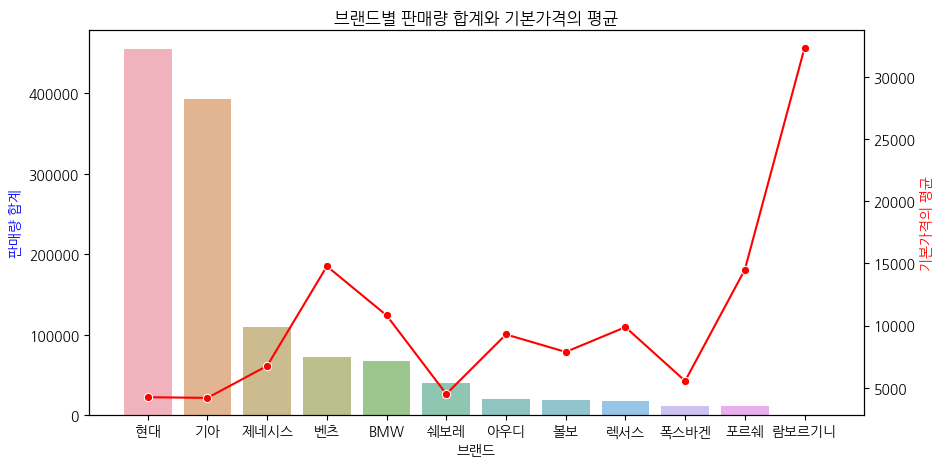

In [27]:
# 브랜드별 기본가격의 평균과 판매량 합계 계산
brand_price_mean = df_long.groupby('브랜드')['기본가격'].mean().reset_index()
brand_sales_sum = df_long.groupby('브랜드')['판매량'].sum().reset_index()

# 판매량 내림차순으로 정렬
brand_sales_sum = brand_sales_sum.sort_values(by='판매량', ascending=False)
brand_price_mean = brand_price_mean.set_index('브랜드').loc[brand_sales_sum['브랜드']].reset_index()

# 브랜드별 고유 색상 설정
unique_brands = brand_sales_sum['브랜드'].unique()
palette = sns.color_palette("husl", len(unique_brands))

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 5))

# 판매량 합계 막대 그래프
sns.barplot(x='브랜드', y='판매량', data=brand_sales_sum, ax=ax1, palette=palette, alpha=0.6)
ax1.set_ylabel('판매량 합계', color='blue')
ax1.set_title('브랜드별 판매량 합계와 기본가격의 평균')

# 기본가격의 평균 선 그래프
ax2 = ax1.twinx()
sns.lineplot(x='브랜드', y='기본가격', data=brand_price_mean, ax=ax2, color='red', marker='o')
ax2.set_ylabel('기본가격의 평균', color='red')

plt.show()

<ipython-input-28-f31dc2f6c902>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='크기', y='판매량', data=size_sales_sum, palette='viridis')


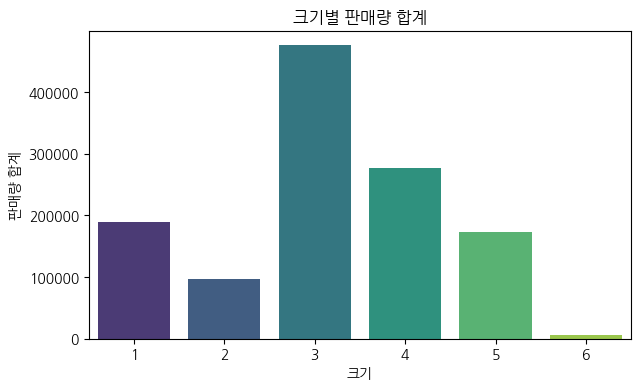

In [28]:
# 크기별 판매량 합계 계산
size_sales_sum = df_long.groupby('크기')['판매량'].sum().reset_index()

# 시각화
plt.figure(figsize=(7, 4))
sns.barplot(x='크기', y='판매량', data=size_sales_sum, palette='viridis')
plt.title('크기별 판매량 합계')
plt.xlabel('크기')
plt.ylabel('판매량 합계')
plt.show()

<ipython-input-29-8ce7685575cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='전기차여부', y='판매량', data=elec_sales_sum, palette='viridis')


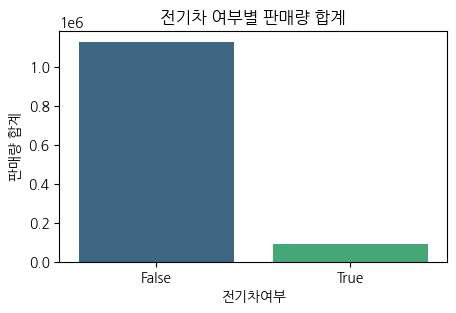

In [29]:
# 크기별 판매량 합계 계산
elec_sales_sum = df_long.groupby('전기차여부')['판매량'].sum().reset_index()

# 시각화
plt.figure(figsize=(5, 3))
sns.barplot(x='전기차여부', y='판매량', data=elec_sales_sum, palette='viridis')
plt.title('전기차 여부별 판매량 합계')
plt.xlabel('전기차여부')
plt.ylabel('판매량 합계')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


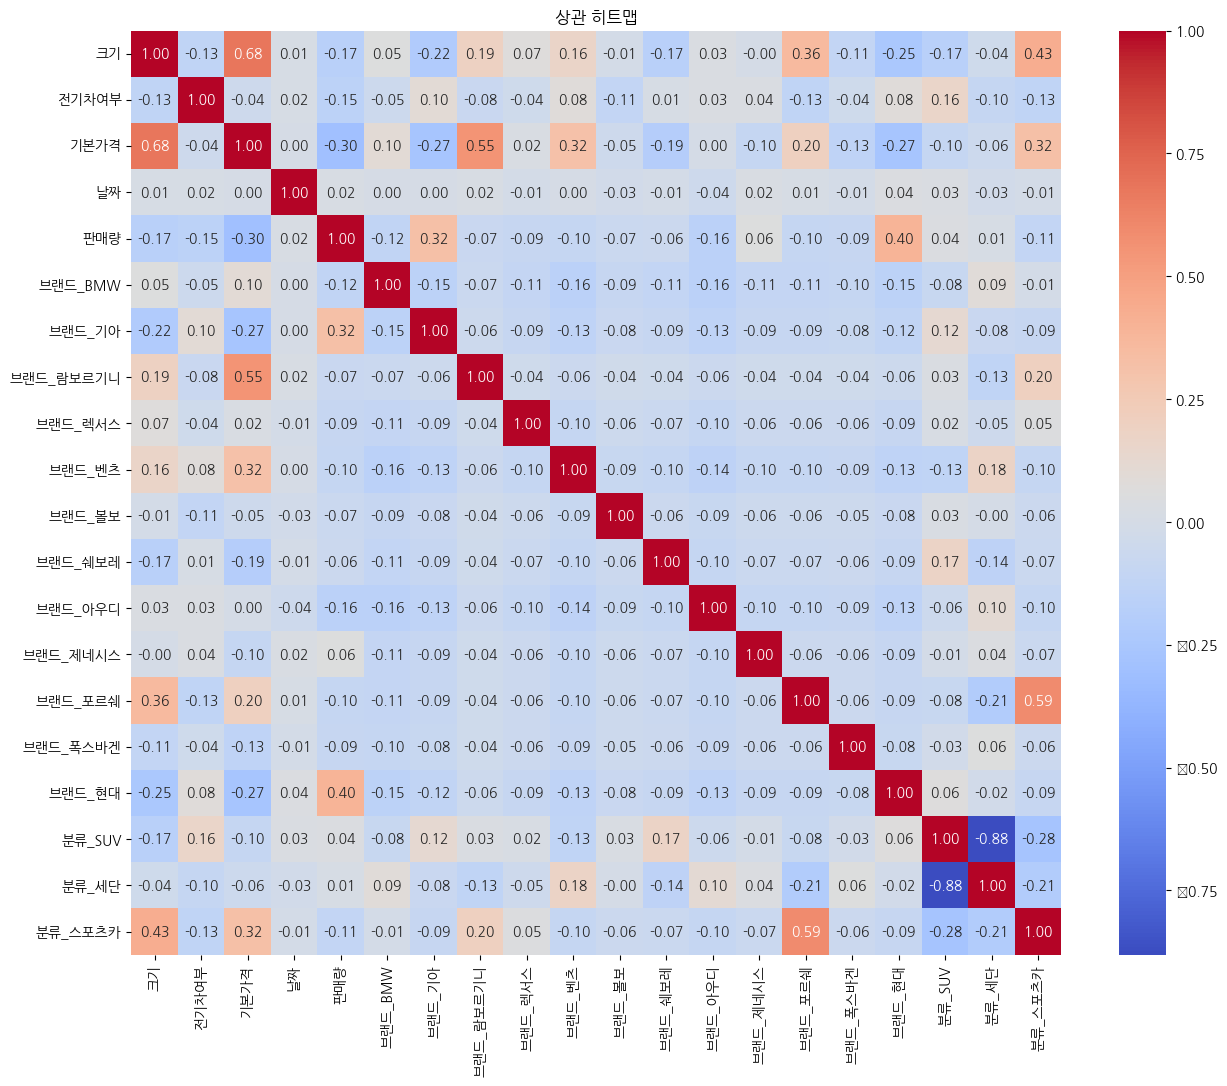

In [30]:
# 상관관계 히트맵
plt.figure(figsize=(15, 12))
sns.heatmap(df.drop(columns = '차량명').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관 히트맵')
plt.show()

<Figure size 1400x700 with 0 Axes>

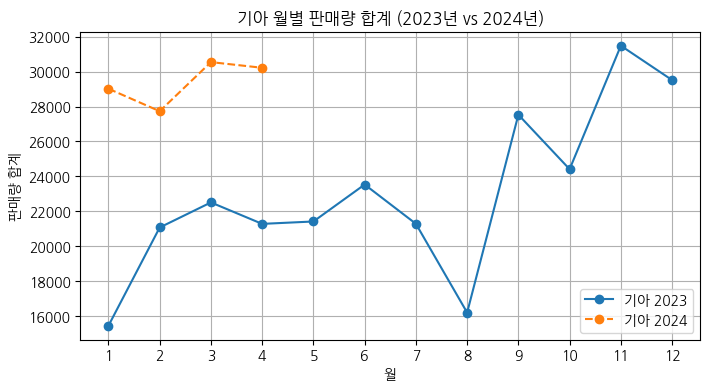

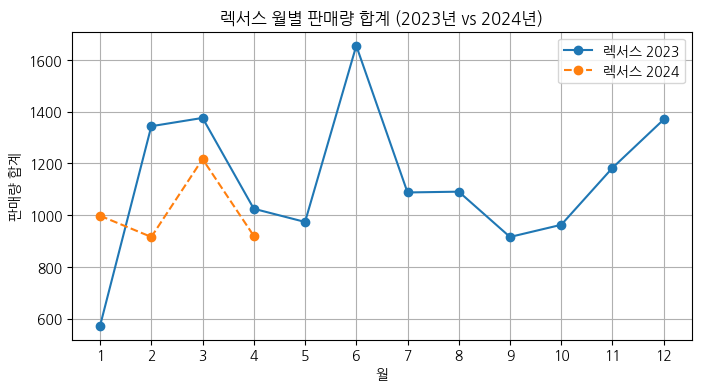

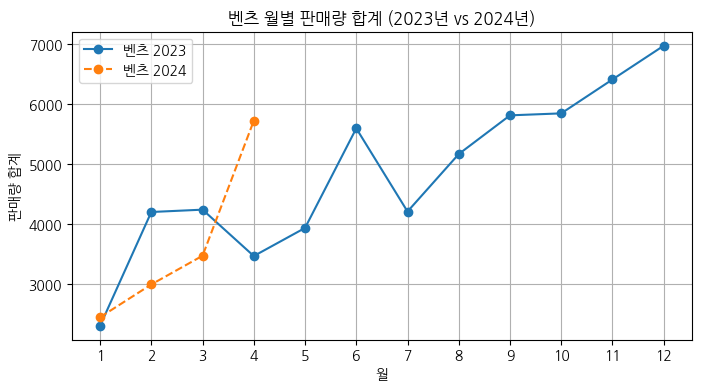

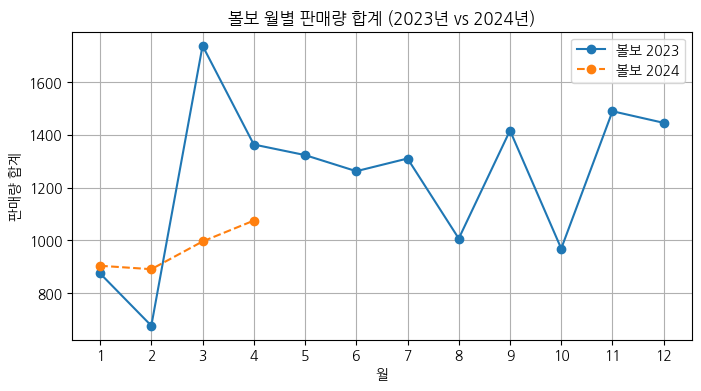

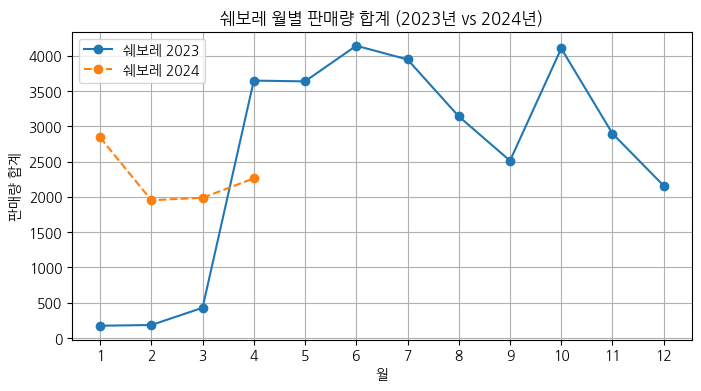

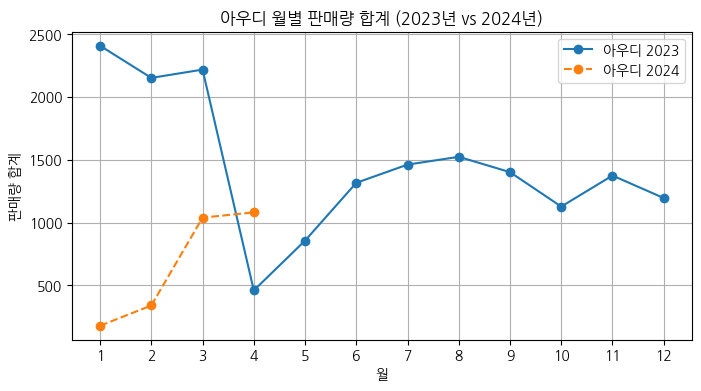

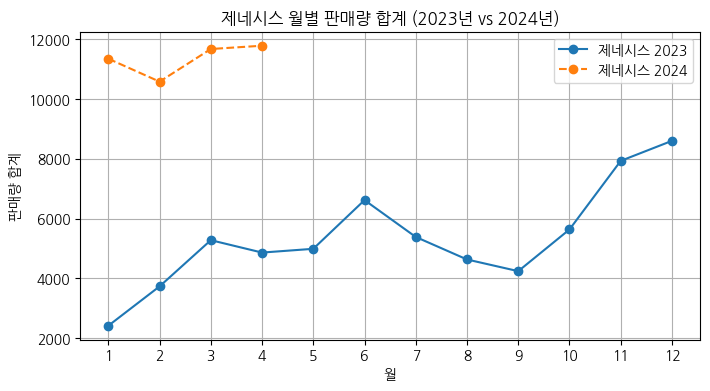

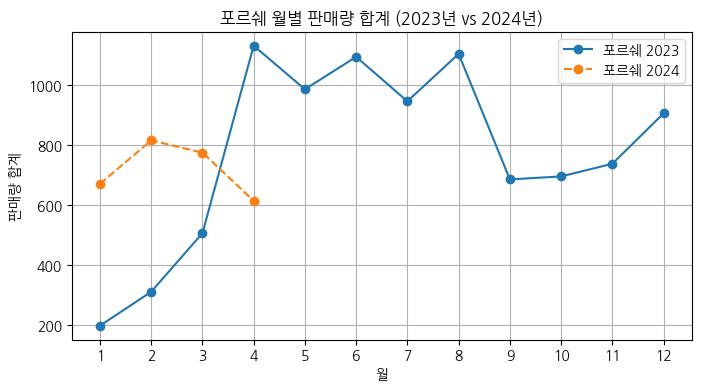

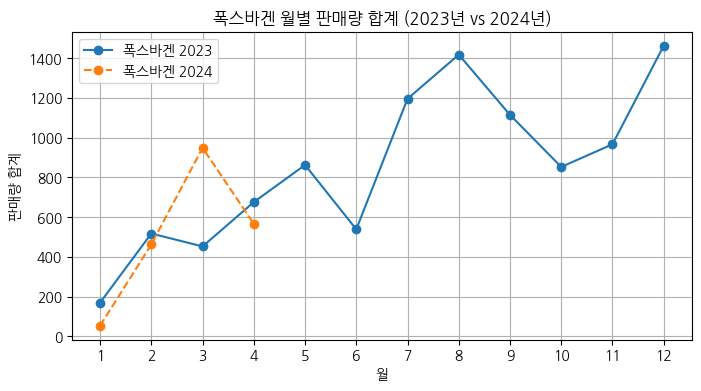

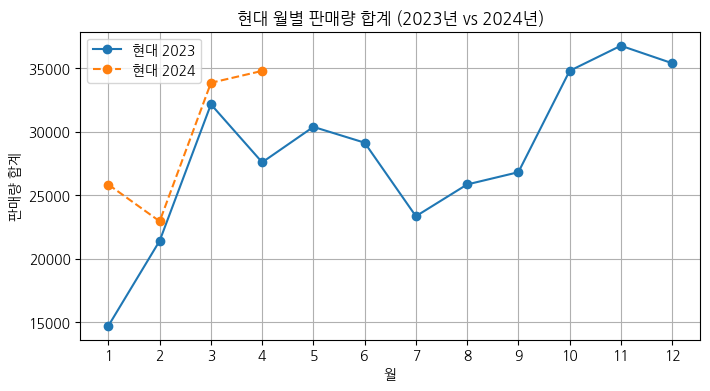

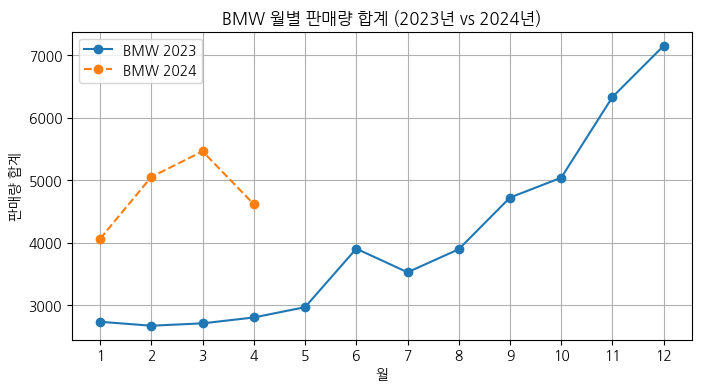

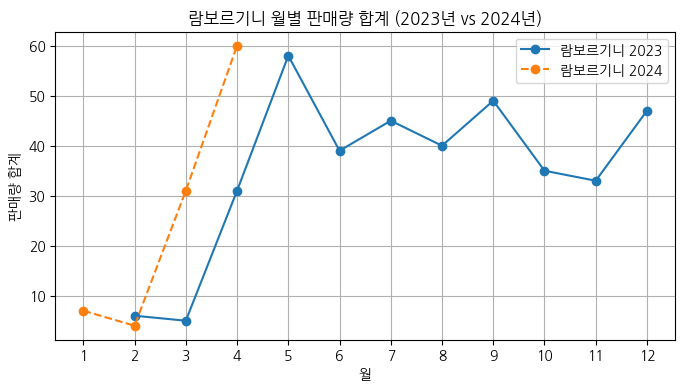

In [31]:
# 연도와 월을 추출
df_long['연도'] = df_long['날짜'].dt.year
df_long['월'] = df_long['날짜'].dt.month

# 데이터프레임을 월별, 브랜드별, 연도별로 집계
monthly_sales = df_long.groupby(['연도', '월', '브랜드'])['판매량'].sum().reset_index()

# 시각화
plt.figure(figsize=(14, 7))

# 각 브랜드별로 꺾은선 그래프를 그리기 위해 unique한 브랜드를 가져옴
brands = df_long['브랜드'].unique()

# 브랜드별로 반복하여 그래프를 그림
for brand in brands:
    plt.figure(figsize=(8, 4))
    brand_data_2023 = monthly_sales[(monthly_sales['브랜드'] == brand) & (monthly_sales['연도'] == 2023)]
    brand_data_2024 = monthly_sales[(monthly_sales['브랜드'] == brand) & (monthly_sales['연도'] == 2024)]

    plt.plot(brand_data_2023['월'], brand_data_2023['판매량'], marker='o', label=f'{brand} 2023')
    plt.plot(brand_data_2024['월'], brand_data_2024['판매량'], marker='o', linestyle='--', label=f'{brand} 2024')

    plt.title(f'{brand} 월별 판매량 합계 (2023년 vs 2024년)')
    plt.xlabel('월')
    plt.ylabel('판매량 합계')
    plt.xticks(range(1, 13))  # x축을 1월부터 12월까지 표시
    plt.legend()
    plt.grid(True)
    plt.show()

<Figure size 1400x700 with 0 Axes>

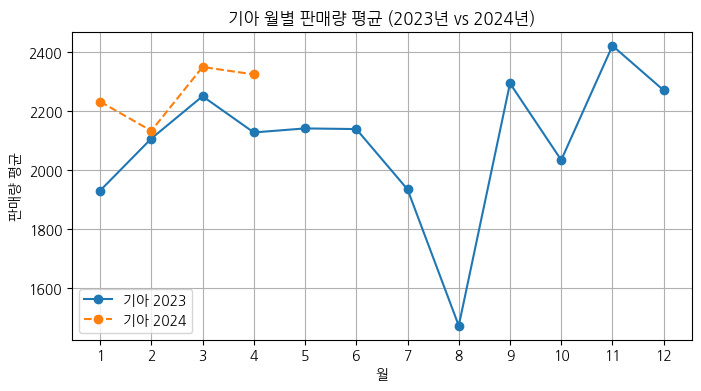

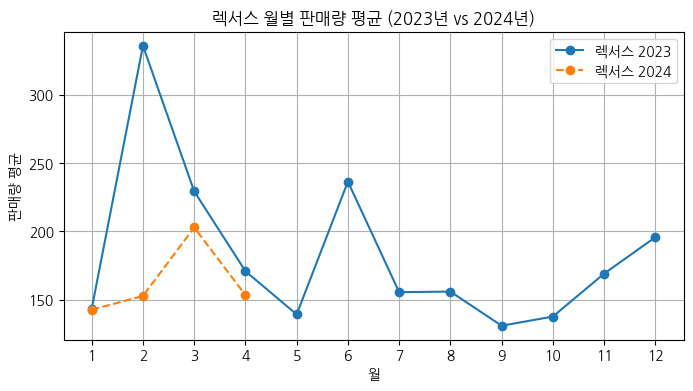

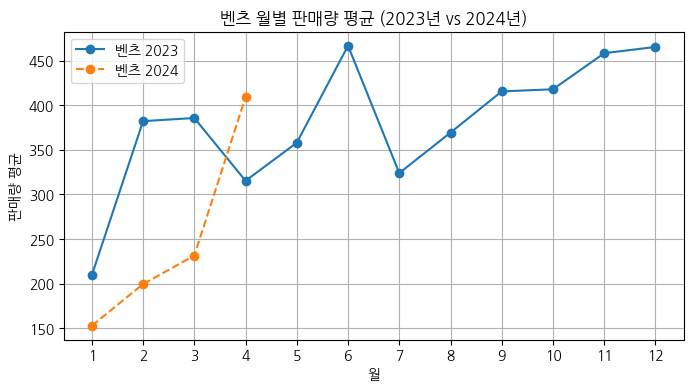

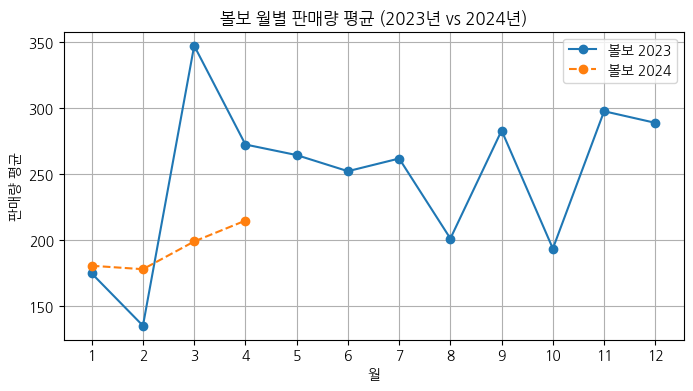

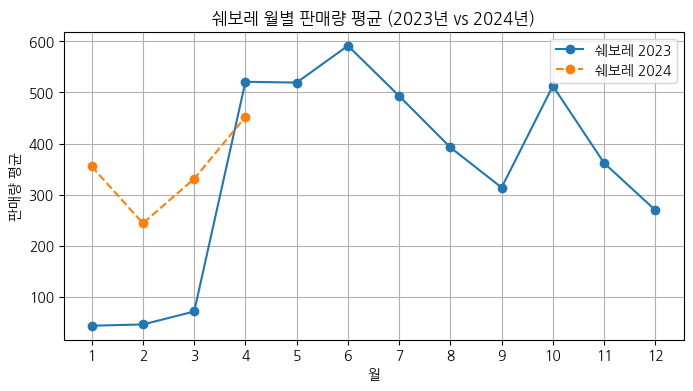

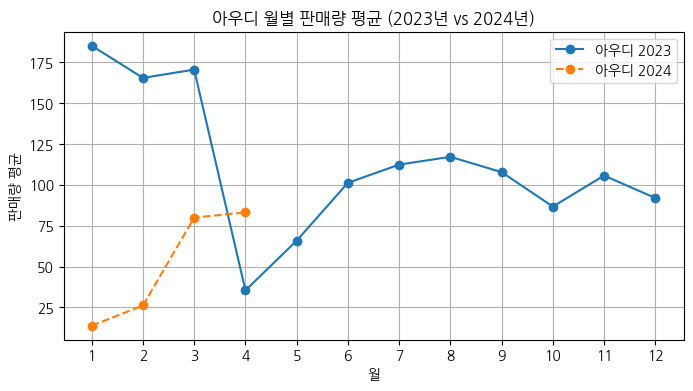

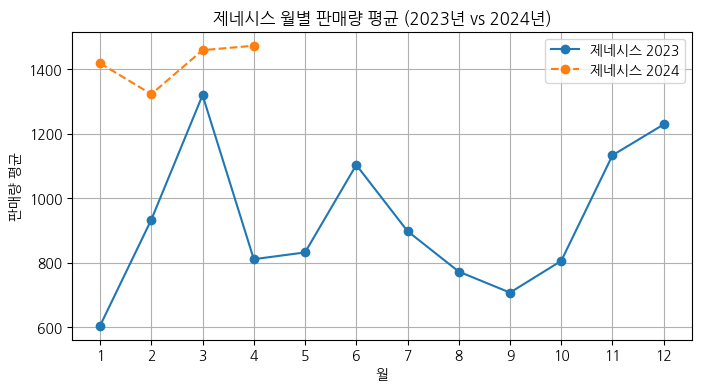

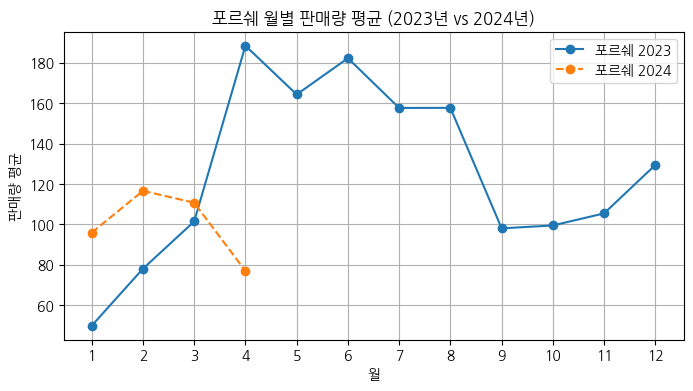

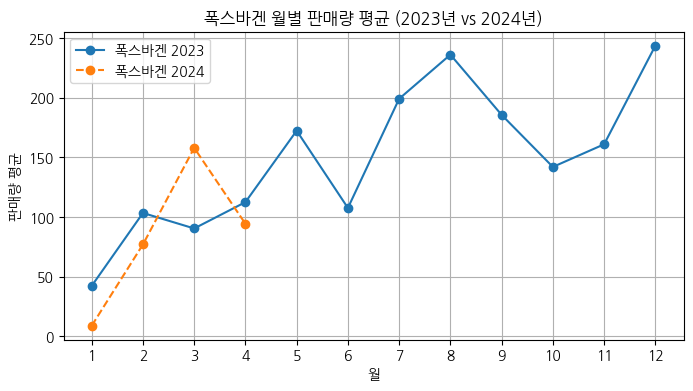

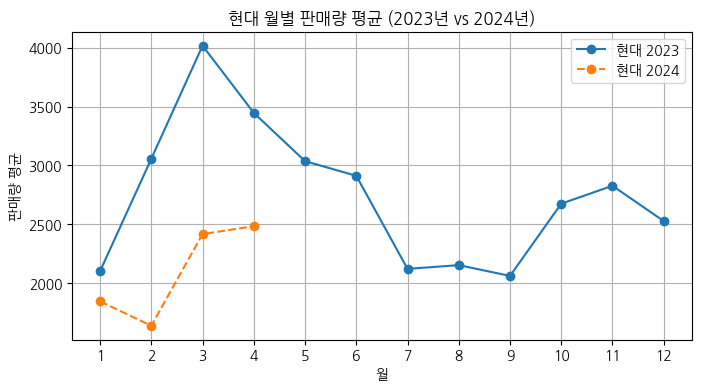

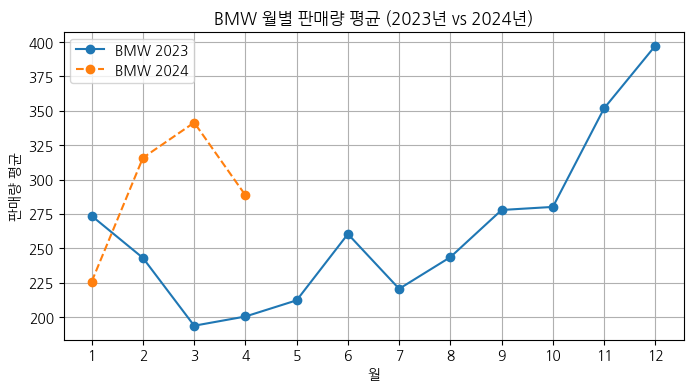

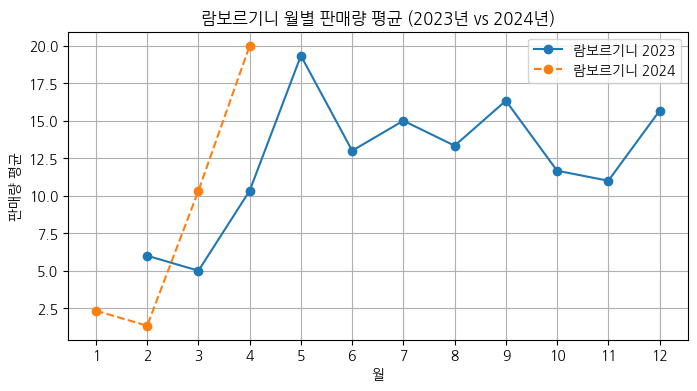

In [32]:
# 데이터프레임을 월별, 브랜드별, 연도별로 집계
monthly_sales = df_long.groupby(['연도', '월', '브랜드'])['판매량'].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 7))

# 각 브랜드별로 꺾은선 그래프를 그리기 위해 unique한 브랜드를 가져옴
brands = df_long['브랜드'].unique()

# 브랜드별로 반복하여 그래프를 그림
for brand in brands:
    plt.figure(figsize=(8, 4))
    brand_data_2023 = monthly_sales[(monthly_sales['브랜드'] == brand) & (monthly_sales['연도'] == 2023)]
    brand_data_2024 = monthly_sales[(monthly_sales['브랜드'] == brand) & (monthly_sales['연도'] == 2024)]

    plt.plot(brand_data_2023['월'], brand_data_2023['판매량'], marker='o', label=f'{brand} 2023')
    plt.plot(brand_data_2024['월'], brand_data_2024['판매량'], marker='o', linestyle='--', label=f'{brand} 2024')

    plt.title(f'{brand} 월별 판매량 평균 (2023년 vs 2024년)')
    plt.xlabel('월')
    plt.ylabel('판매량 평균')
    plt.xticks(range(1, 13))  # x축을 1월부터 12월까지 표시
    plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
df_dummied.to_csv('차량 판매 데이터_전처리완', index=False)

In [34]:
df_long.to_csv('차량 판매 데이터_롱버전', index=False)

# 모든 데이터 클러스터링

In [35]:
data = df_dummied

In [36]:
!pip install dtaidistance scipy

In [87]:
from dtaidistance import dtw
from scipy.cluster.hierarchy import linkage, fcluster
from tslearn.metrics import lcss
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from tslearn.metrics import cdist_dtw

<ipython-input-80-92d9d2f0ed22>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(soft_dtw, method='ward')


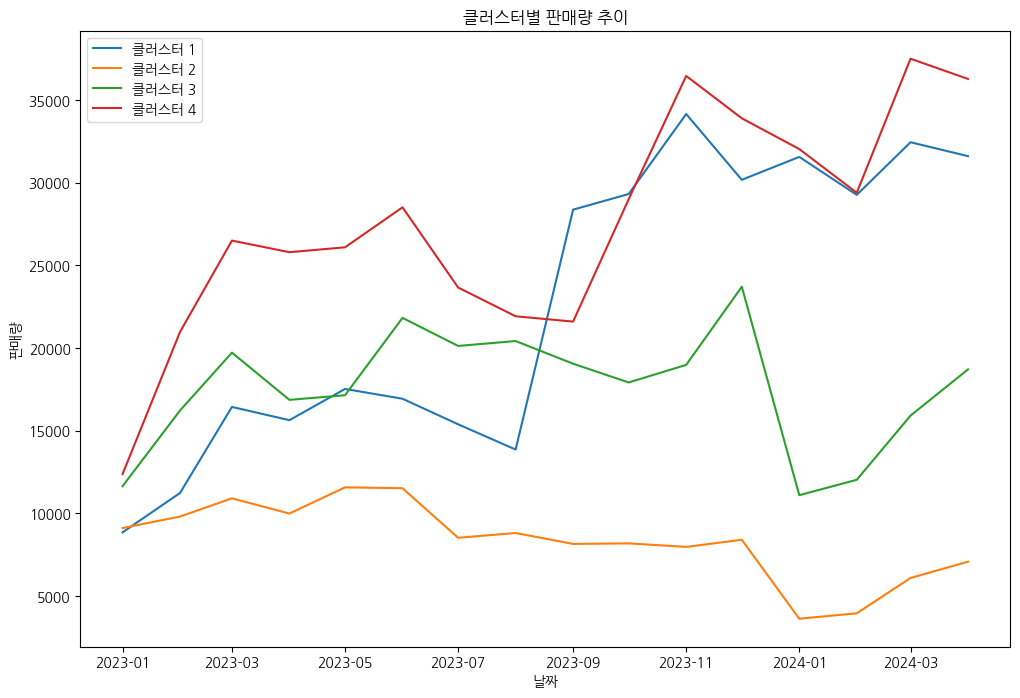

전체 데이터에 대한 실루엣 계수: 0.7042648826521312


In [80]:
# 데이터 준비
data['날짜'] = pd.to_datetime(data['날짜'])
data = data.sort_values(by='날짜')

# 피벗 테이블 생성: 차량명을 기준으로 날짜별 판매량"
pivot_df = data.pivot_table(index='날짜', columns='차량명', values='판매량').fillna(0)

# soft-DTW 매트릭스 계산
soft_dtw = dtw.distance_matrix_fast(pivot_df.T.values, compact=False)

# 계층적 클러스터링 수행
linkage_matrix = linkage(soft_dtw, method='ward')
cluster_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# 클러스터별 차량명 매핑
clustered_data = pd.DataFrame({'차량명': pivot_df.columns, '클러스터': cluster_labels})

# 클러스터별 판매량 추이 시각화
plt.figure(figsize=(12, 8))
for cluster in range(1, 5):
    cluster_series = pivot_df[clustered_data[clustered_data['클러스터'] == cluster]['차량명']]
    plt.plot(cluster_series.sum(axis=1), label=f'클러스터 {cluster}')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.title('클러스터별 판매량 추이')
plt.legend()
plt.show()

# 실루엣 계수 계산
silhouette_avg = silhouette_score(pivot_df.T, cluster_labels, metric='euclidean')
print(f"전체 데이터에 대한 실루엣 계수: {silhouette_avg}")

<ipython-input-82-20f1398a4c77>:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(soft_dtw, method='ward')


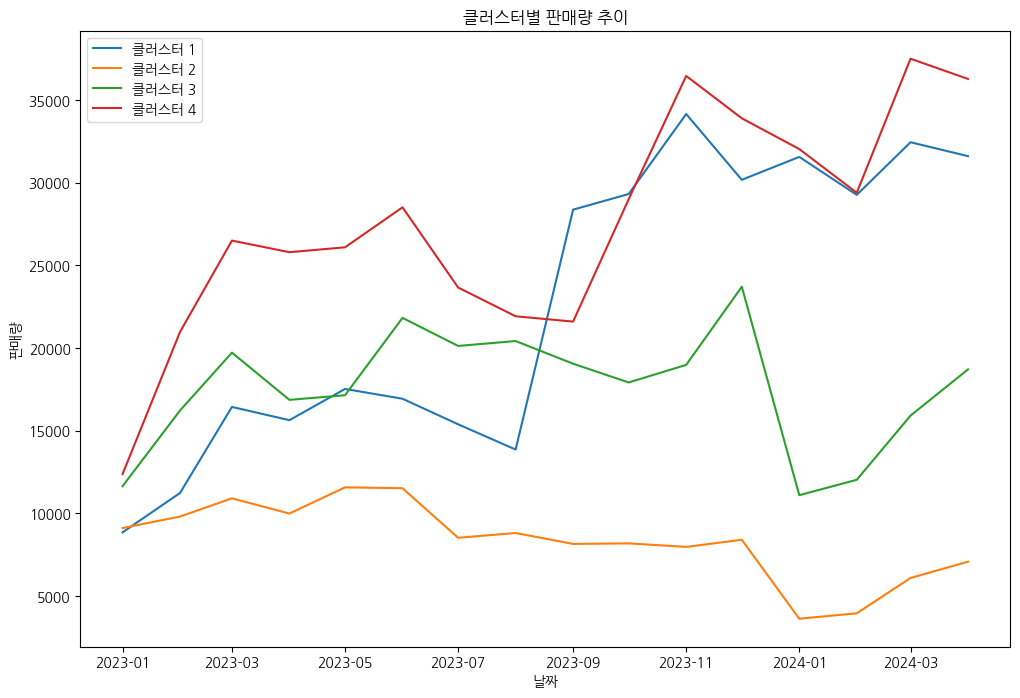

전체 데이터에 대한 실루엣 계수 (soft-DTW): 0.7343961725464442


In [82]:
# 데이터 준비
data['날짜'] = pd.to_datetime(data['날짜'])
data = data.sort_values(by='날짜')

# 피벗 테이블 생성: 차량명을 기준으로 날짜별 판매량
pivot_df = data.pivot_table(index='날짜', columns='차량명', values='판매량').fillna(0)

# soft-DTW 매트릭스 계산
soft_dtw = dtw.distance_matrix_fast(pivot_df.T.values, compact=False)

# 대각 요소를 0으로 설정
np.fill_diagonal(soft_dtw, 0)

# 계층적 클러스터링 수행
linkage_matrix = linkage(soft_dtw, method='ward')
cluster_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# 클러스터별 차량명 매핑
clustered_data = pd.DataFrame({'차량명': pivot_df.columns, '클러스터': cluster_labels})

# 클러스터별 판매량 추이 시각화
plt.figure(figsize=(12, 8))
for cluster in range(1, 5):
    cluster_series = pivot_df[clustered_data[clustered_data['클러스터'] == cluster]['차량명']]
    plt.plot(cluster_series.sum(axis=1), label=f'클러스터 {cluster}')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.title('클러스터별 판매량 추이')
plt.legend()
plt.show()

# 실루엣 계수 계산 (soft-DTW)
silhouette_avg = silhouette_score(soft_dtw, cluster_labels, metric='precomputed')

print(f"전체 데이터에 대한 실루엣 계수 (soft-DTW): {silhouette_avg}")

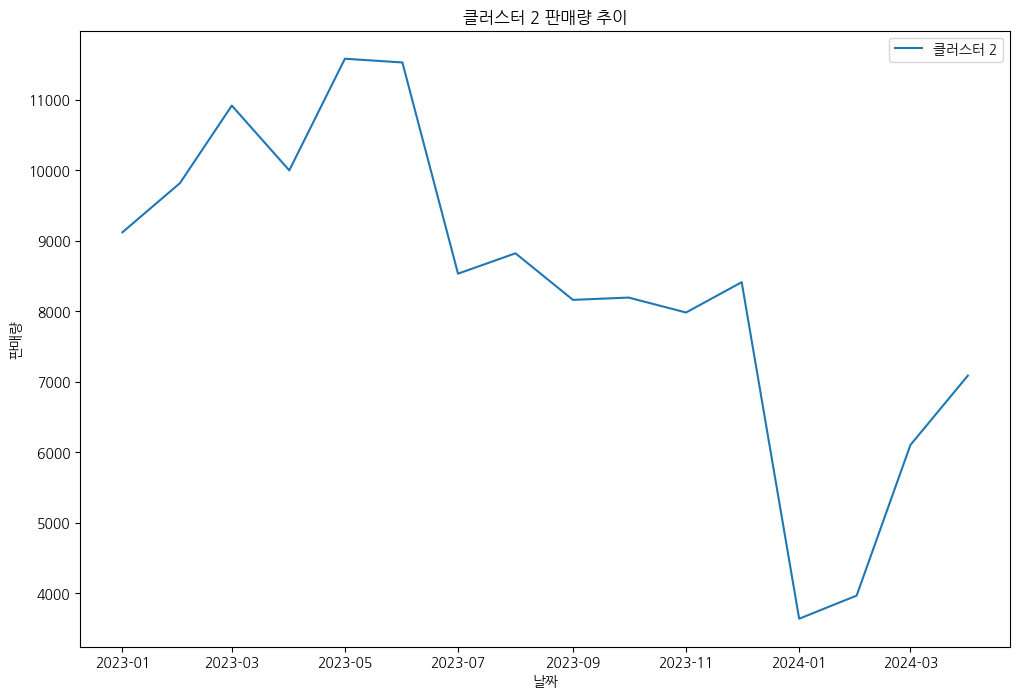

In [66]:
# 클러스터 n만 시각화
plt.figure(figsize=(12, 8))
cluster = 2
cluster_series = pivot_df[clustered_data[clustered_data['클러스터'] == cluster]['차량명']]
plt.plot(cluster_series.sum(axis=1), label=f'클러스터 {cluster}')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.title(f'클러스터 {cluster} 판매량 추이')
plt.legend()
plt.show()

In [83]:
# 클러스터별 차량명 그룹화
clustered_groups = clustered_data.groupby('클러스터')['차량명'].apply(list).reset_index()

# 클러스터별 차량명 출력
for index, row in clustered_groups.iterrows():
    print(f"클러스터 {row['클러스터']}:")
    for model in row['차량명']:
        print(f"  - {model}")

클러스터 1:
  - 기아 셀토스
  - 기아 스포티지
  - 기아 쏘렌토
  - 현대 더뉴 아반떼
  - 현대 디올뉴 산타페
클러스터 2:
  - 현대 디올뉴 그랜저
클러스터 3:
  - BMW 1 series
  - BMW 2 series
  - BMW 3 series
  - BMW 6 Series
  - BMW 7 Series
  - BMW 8 sereis
  - BMW X1
  - BMW X3
  - BMW X4
  - BMW X5
  - BMW X6
  - BMW X7
  - BMW XM
  - BMW Z4
  - BMW i5
  - BMW i7
  - BMW ix3
  - 기아 EV9
  - 기아 K9
  - 기아 니로 플러스
  - 기아 니로EV
  - 기아 모하비
  - 람보르기니 Huracan EVO
  - 람보르기니 urus
  - 람보르기니 urus S
  - 렉서스 ES
  - 렉서스 LC
  - 렉서스 LS
  - 렉서스 NEW RX
  - 렉서스 NX
  - 렉서스 RZ
  - 렉서스 UX
  - 밴츠 C-class
  - 밴츠 EQE
  - 밴츠 cls-class
  - 밴츠 eqs
  - 밴츠 maybach
  - 밴츠 maybach GLS
  - 밴츠 the new maybach GLS
  - 벤츠 A-class
  - 벤츠 A-class 2024
  - 벤츠 E-class 2024
  - 벤츠 EQE SUV
  - 벤츠 EQS SUV
  - 벤츠 G-Class
  - 벤츠 GLE-clss
  - 벤츠 S-class
  - 벤츠 The New GLC-Class
  - 볼보 S60
  - 볼보 s90
  - 볼보 xc40
  - 볼보 xc60
  - 볼보 xc90
  - 쉐보레 말리부
  - 쉐보레 볼트 EUV
  - 쉐보레 볼트 EV
  - 쉐보레 이쿼녹스
  - 쉐보레 타호
  - 쉐보레 트래버스
  - 쉐보레 트레일블레이저
  - 아우디 A3
  - 아우디 A4
  - 아우디 A5
  - 아우디 E-tron
  - 아우디 E-

# 비 전기차 클러스터링

<ipython-input-90-c36c2242ea1b>:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(soft_dtw, method='ward')


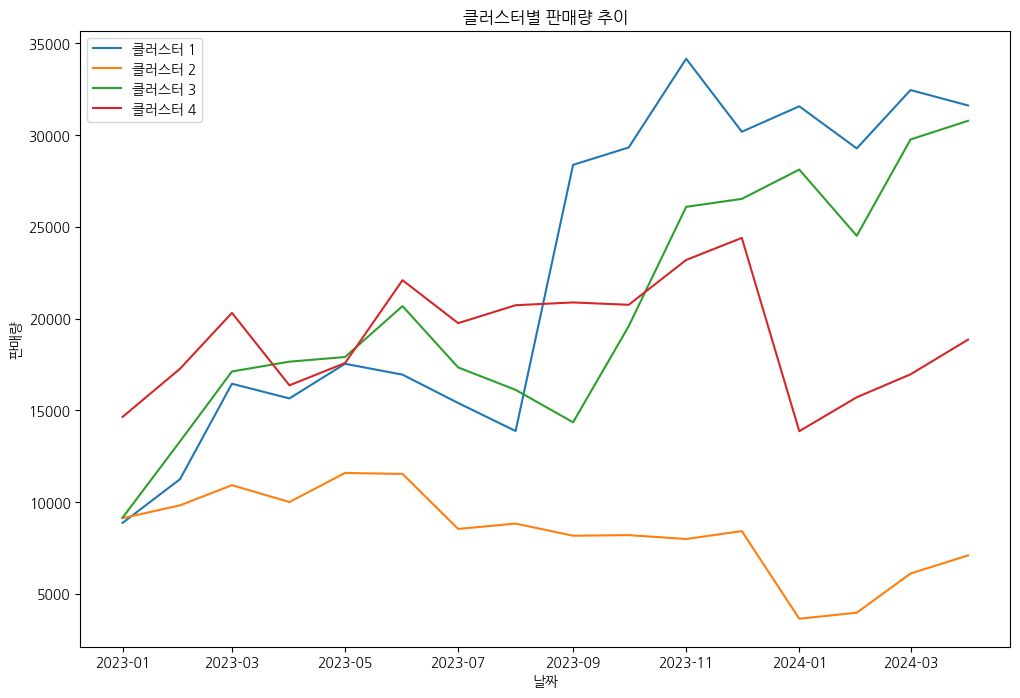

전체 데이터에 대한 실루엣 계수 (soft-DTW): 0.742478369048286


In [90]:
# Filter the data to include only rows where '전기차여부' is False
filtered_data = data[data['전기차여부'] == False]

# 피벗 테이블 생성: 차량명을 기준으로 날짜별 판매량
pivot_df = filtered_data.pivot_table(index='날짜', columns='차량명', values='판매량').fillna(0)

# soft-DTW 매트릭스 계산
soft_dtw = dtw.distance_matrix_fast(pivot_df.T.values, compact=False)

# 대각 요소를 0으로 설정
np.fill_diagonal(soft_dtw, 0)

# 계층적 클러스터링 수행
linkage_matrix = linkage(soft_dtw, method='ward')
cluster_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# 클러스터별 차량명 매핑
clustered_data = pd.DataFrame({'차량명': pivot_df.columns, '클러스터': cluster_labels})

# 클러스터별 판매량 추이 시각화
plt.figure(figsize=(12, 8))
for cluster in range(1, 5):
    cluster_series = pivot_df[clustered_data[clustered_data['클러스터'] == cluster]['차량명']]
    plt.plot(cluster_series.sum(axis=1), label=f'클러스터 {cluster}')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.title('클러스터별 판매량 추이')
plt.legend()
plt.show()

# 실루엣 계수 계산 (soft-DTW)
silhouette_avg = silhouette_score(soft_dtw, cluster_labels, metric='precomputed')

print(f"전체 데이터에 대한 실루엣 계수 (soft-DTW): {silhouette_avg}")

In [91]:
# 클러스터별 차량명 그룹화
clustered_groups = clustered_data.groupby('클러스터')['차량명'].apply(list).reset_index()

# 클러스터별 차량명 출력
for index, row in clustered_groups.iterrows():
    print(f"클러스터 {row['클러스터']}:")
    for model in row['차량명']:
        print(f"  - {model}")

클러스터 1:
  - 기아 셀토스
  - 기아 스포티지
  - 기아 쏘렌토
  - 현대 더뉴 아반떼
  - 현대 디올뉴 산타페
클러스터 2:
  - 현대 디올뉴 그랜저
클러스터 3:
  - 기아 K5
  - 기아K8
  - 쉐보레 트랙스 크로스오버
  - 제네시스 GV70
  - 제네시스 뉴 G80
  - 제네시스 뉴 GV80
  - 현대 더뉴 투싼
  - 현대 디올뉴 코나
  - 현대 쏘나타 디엣지
  - 현대 팰리세이드
클러스터 4:
  - BMW 1 series
  - BMW 2 series
  - BMW 3 series
  - BMW 5 Series
  - BMW 6 Series
  - BMW 7 Series
  - BMW 8 sereis
  - BMW X1
  - BMW X3
  - BMW X4
  - BMW X5
  - BMW X6
  - BMW X7
  - BMW XM
  - BMW Z4
  - 기아 K3
  - 기아 K9
  - 기아 니로
  - 기아 모하비
  - 람보르기니 Huracan EVO
  - 람보르기니 urus
  - 람보르기니 urus S
  - 렉서스 ES
  - 렉서스 LC
  - 렉서스 LS
  - 렉서스 NEW RX
  - 렉서스 NX
  - 렉서스 UX
  - 밴츠 C-class
  - 밴츠 cls-class
  - 밴츠 maybach
  - 밴츠 maybach GLS
  - 밴츠 the new maybach GLS
  - 벤츠 A-class
  - 벤츠 A-class 2024
  - 벤츠 E-class
  - 벤츠 E-class 2024
  - 벤츠 G-Class
  - 벤츠 GLE-clss
  - 벤츠 S-class
  - 벤츠 The New GLC-Class
  - 볼보 S60
  - 볼보 s90
  - 볼보 xc40
  - 볼보 xc60
  - 볼보 xc90
  - 쉐보레 말리부
  - 쉐보레 이쿼녹스
  - 쉐보레 타호
  - 쉐보레 트래버스
  - 쉐보레 트레일블레이저
  - 아우디 A3
  - 아우디 A4
  

<ipython-input-86-3bf011b0d41d>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(soft_dtw, method='ward')


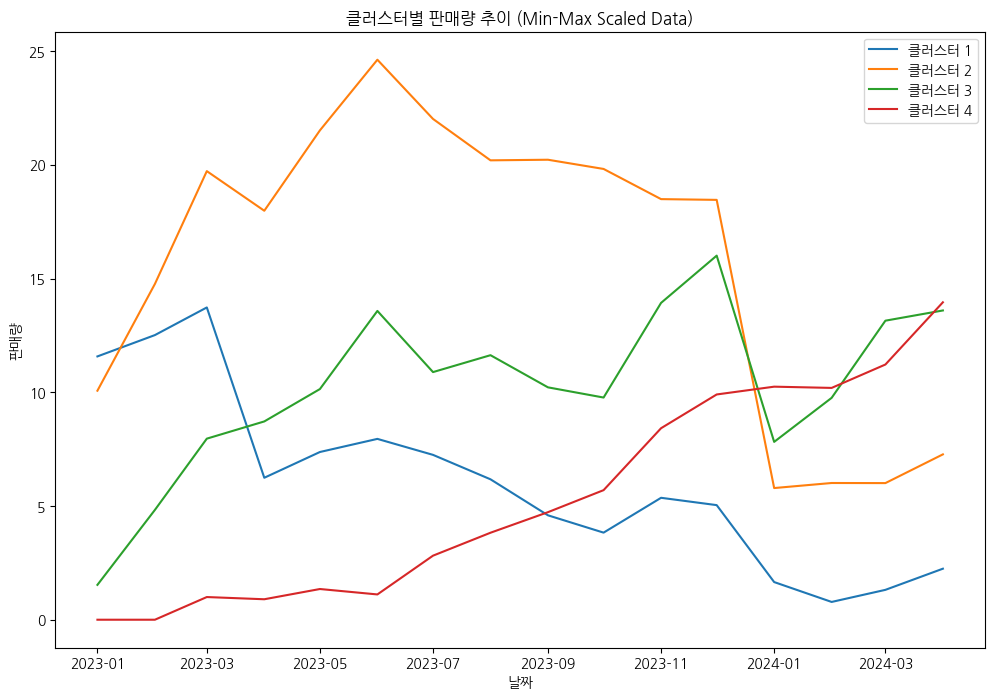

전체 데이터에 대한 실루엣 계수 (soft-DTW, Min-Max Scaled Data): 0.19837259161429435


In [86]:
# Min-Max 스케일러 적용
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(pivot_df), index=pivot_df.index, columns=pivot_df.columns)

# soft-DTW 매트릭스 계산
soft_dtw = dtw.distance_matrix_fast(scaled_data.T.values, compact=False)

# 대각 요소를 0으로 설정
np.fill_diagonal(soft_dtw, 0)

# 계층적 클러스터링 수행
linkage_matrix = linkage(soft_dtw, method='ward')
cluster_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# 클러스터별 차량명 매핑
clustered_data = pd.DataFrame({'차량명': scaled_data.columns, '클러스터': cluster_labels})

# 클러스터별 판매량 추이 시각화
plt.figure(figsize=(12, 8))
for cluster in range(1, 5):
    cluster_series = scaled_data[clustered_data[clustered_data['클러스터'] == cluster]['차량명']]
    plt.plot(cluster_series.sum(axis=1), label=f'클러스터 {cluster}')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.title('클러스터별 판매량 추이 (Min-Max Scaled Data)')
plt.legend()
plt.show()

# 실루엣 계수 계산 (soft-DTW)
silhouette_avg = silhouette_score(soft_dtw, cluster_labels, metric='precomputed')

print(f"전체 데이터에 대한 실루엣 계수 (soft-DTW, Min-Max Scaled Data): {silhouette_avg}")

In [50]:
# 클러스터별 차량명 그룹화
clustered_groups = clustered_data.groupby('클러스터')['차량명'].apply(list).reset_index()

# 클러스터별 차량명 출력
for index, row in clustered_groups.iterrows():
    print(f"클러스터 {row['클러스터']}:")
    for model in row['차량명']:
        print(f"  - {model}")

클러스터 1:
  - 기아 셀토스
  - 기아 스포티지
  - 기아 쏘렌토
  - 현대 더뉴 아반떼
  - 현대 디올뉴 산타페
클러스터 2:
  - 현대 디올뉴 그랜저
클러스터 3:
  - 기아 K5
  - 기아K8
  - 쉐보레 트랙스 크로스오버
  - 제네시스 GV70
  - 제네시스 뉴 G80
  - 제네시스 뉴 GV80
  - 현대 더뉴 투싼
  - 현대 디올뉴 코나
  - 현대 쏘나타 디엣지
  - 현대 팰리세이드
클러스터 4:
  - BMW 1 series
  - BMW 2 series
  - BMW 3 series
  - BMW 5 Series
  - BMW 6 Series
  - BMW 7 Series
  - BMW 8 sereis
  - BMW X1
  - BMW X3
  - BMW X4
  - BMW X5
  - BMW X6
  - BMW X7
  - BMW XM
  - BMW Z4
  - 기아 K3
  - 기아 K9
  - 기아 니로
  - 기아 모하비
  - 람보르기니 Huracan EVO
  - 람보르기니 urus
  - 람보르기니 urus S
  - 렉서스 ES
  - 렉서스 LC
  - 렉서스 LS
  - 렉서스 NEW RX
  - 렉서스 NX
  - 렉서스 UX
  - 밴츠 C-class
  - 밴츠 cls-class
  - 밴츠 maybach
  - 밴츠 maybach GLS
  - 밴츠 the new maybach GLS
  - 벤츠 A-class
  - 벤츠 A-class 2024
  - 벤츠 E-class
  - 벤츠 E-class 2024
  - 벤츠 G-Class
  - 벤츠 GLE-clss
  - 벤츠 S-class
  - 벤츠 The New GLC-Class
  - 볼보 S60
  - 볼보 s90
  - 볼보 xc40
  - 볼보 xc60
  - 볼보 xc90
  - 쉐보레 말리부
  - 쉐보레 이쿼녹스
  - 쉐보레 타호
  - 쉐보레 트래버스
  - 쉐보레 트레일블레이저
  - 아우디 A3
  - 아우디 A4
  

In [52]:
!pip install tslearn

In [54]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler

<ipython-input-85-d809b09f446f>:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(soft_dtw, method='ward')


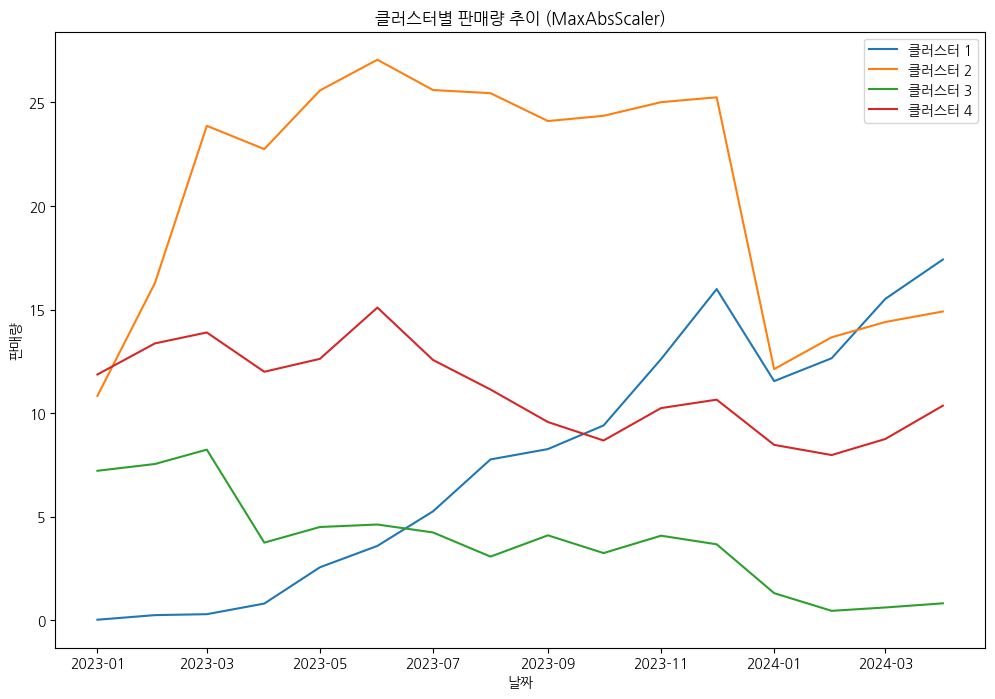

클러스터 1:
  - BMW 5 Series
  - BMW X1
  - BMW X5
  - BMW X6
  - BMW XM
  - 기아 K5
  - 기아 쏘렌토
  - 람보르기니 urus
  - 람보르기니 urus S
  - 렉서스 NEW RX
  - 밴츠 the new maybach GLS
  - 벤츠 A-class 2024
  - 벤츠 E-class 2024
  - 벤츠 GLE-clss
  - 벤츠 The New GLC-Class
  - 쉐보레 트레일블레이저
  - 제네시스 뉴 G80
  - 제네시스 뉴 GV80
  - 포르쉐 cayenne 신형
  - 포르쉐 the new panamera
  - 폭스바겐 Jetta
  - 현대 더뉴 아반떼N
  - 현대 더뉴 투싼
  - 현대 디올뉴 산타페
  - 현대 쏘나타 디엣지
클러스터 2:
  - BMW 1 series
  - BMW 2 series
  - BMW 3 series
  - BMW 7 Series
  - BMW 8 sereis
  - BMW X7
  - BMW Z4
  - 람보르기니 Huracan EVO
  - 렉서스 NX
  - 렉서스 UX
  - 밴츠 C-class
  - 밴츠 cls-class
  - 밴츠 maybach
  - 밴츠 maybach GLS
  - 벤츠 E-class
  - 벤츠 G-Class
  - 볼보 S60
  - 볼보 xc40
  - 볼보 xc60
  - 쉐보레 타호
  - 쉐보레 트래버스
  - 쉐보레 트랙스 크로스오버
  - 아우디 A3
  - 아우디 a7
  - 아우디 a8
  - 아우디 q7
  - 제네시스 G70
  - 제네시스 GV60
  - 제네시스 GV70
  - 포르쉐 718 boxster
  - 포르쉐 Carera 911
  - 포르쉐 Macan
  - 포르쉐 panamera
  - 포르쉐 taycan
  - 폭스바겐 Arteon
  - 폭스바겐 Golf
  - 폭스바겐 Tiguan
  - 폭스바겐 Touareg
  - 현대 넥쏘
  - 현대 더뉴 아반떼
  

<ipython-input-85-d809b09f446f>:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(soft_dtw, method='ward')


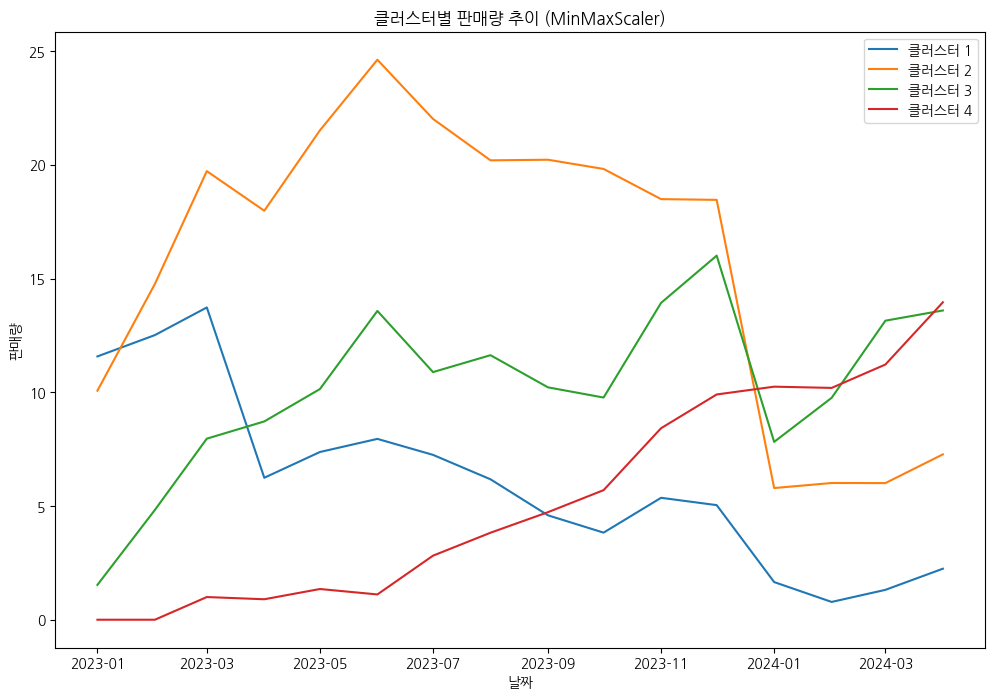

클러스터 1:
  - BMW X3
  - BMW X4
  - 기아 K9
  - 기아 모하비
  - 기아K8
  - 벤츠 A-class
  - 볼보 s90
  - 쉐보레 말리부
  - 아우디 A4
  - 아우디 A5
  - 아우디 a6
  - 아우디 q3
  - 아우디 q5
  - 아우디 q8
  - 현대 디올뉴 그랜저
  - 현대 팰리세이드
클러스터 2:
  - BMW 1 series
  - BMW 2 series
  - BMW 3 series
  - BMW 6 Series
  - BMW XM
  - 기아 니로
  - 람보르기니 Huracan EVO
  - 렉서스 LC
  - 렉서스 LS
  - 렉서스 NX
  - 밴츠 cls-class
  - 밴츠 maybach
  - 밴츠 maybach GLS
  - 벤츠 E-class
  - 벤츠 S-class
  - 볼보 S60
  - 볼보 xc90
  - 쉐보레 이쿼녹스
  - 쉐보레 타호
  - 쉐보레 트래버스
  - 아우디 A3
  - 아우디 a7
  - 아우디 a8
  - 아우디 q7
  - 제네시스 G70
  - 제네시스 G90
  - 제네시스 GV60
  - 제네시스 GV70
  - 포르쉐 Carera 911
  - 포르쉐 Macan
  - 포르쉐 cayenne
  - 포르쉐 panamera
  - 포르쉐 taycan
  - 폭스바겐 Arteon
  - 폭스바겐 Golf
  - 폭스바겐 Tiguan
  - 폭스바겐 Touareg
  - 현대 넥쏘
  - 현대 베뉴
클러스터 3:
  - BMW 7 Series
  - BMW 8 sereis
  - BMW X1
  - BMW X7
  - BMW Z4
  - 기아 K3
  - 기아 셀토스
  - 기아 스포티지
  - 람보르기니 urus S
  - 렉서스 ES
  - 렉서스 NEW RX
  - 렉서스 UX
  - 밴츠 C-class
  - 벤츠 G-Class
  - 벤츠 GLE-clss
  - 벤츠 The New GLC-Class
  - 볼보 xc40
  - 볼보 x

<ipython-input-85-d809b09f446f>:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(soft_dtw, method='ward')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


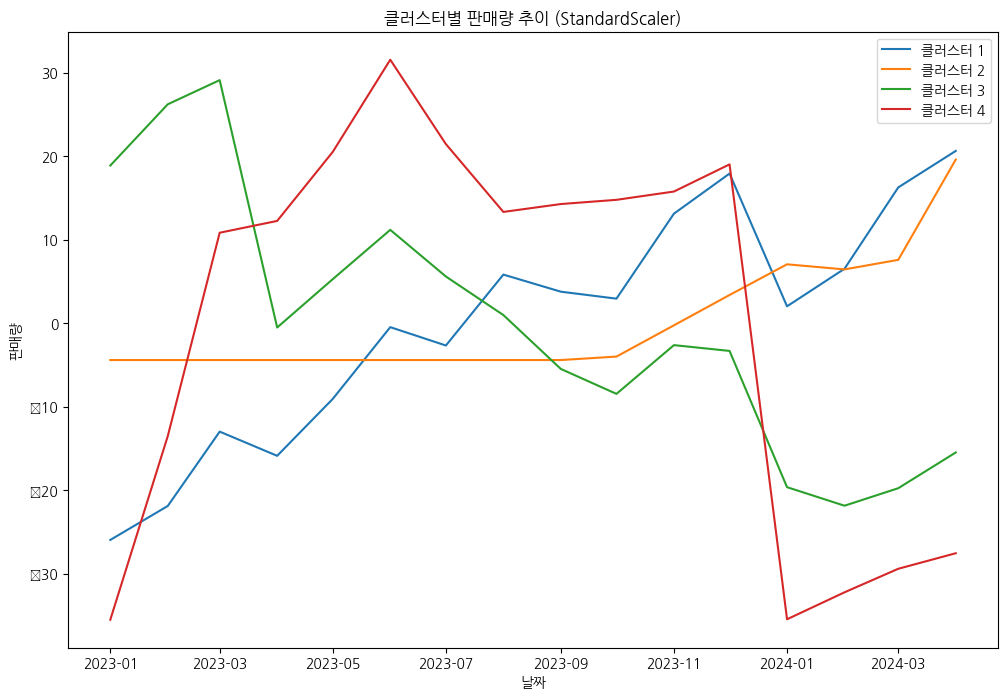

클러스터 1:
  - BMW 5 Series
  - BMW 7 Series
  - BMW X5
  - BMW X6
  - BMW Z4
  - 기아 K3
  - 기아 스포티지
  - 기아 쏘렌토
  - 람보르기니 urus
  - 람보르기니 urus S
  - 렉서스 NEW RX
  - 렉서스 UX
  - 밴츠 C-class
  - 벤츠 GLE-clss
  - 벤츠 The New GLC-Class
  - 쉐보레 트레일블레이저
  - 포르쉐 cayenne 신형
  - 현대 더뉴 아반떼
  - 현대 더뉴 아반떼N
  - 현대 디올뉴 산타페
  - 현대 쏘나타 디엣지
클러스터 2:
  - 기아 K5
  - 밴츠 the new maybach GLS
  - 벤츠 A-class 2024
  - 벤츠 E-class 2024
  - 제네시스 뉴 G80
  - 제네시스 뉴 GV80
  - 포르쉐 the new panamera
  - 현대 더뉴 투싼
클러스터 3:
  - BMW 6 Series
  - BMW X3
  - BMW X4
  - 기아 K9
  - 기아 모하비
  - 기아K8
  - 벤츠 A-class
  - 벤츠 S-class
  - 볼보 s90
  - 쉐보레 말리부
  - 아우디 A4
  - 아우디 A5
  - 아우디 a6
  - 아우디 q3
  - 아우디 q5
  - 아우디 q7
  - 아우디 q8
  - 현대 디올뉴 그랜저
  - 현대 팰리세이드
클러스터 4:
  - BMW 1 series
  - BMW 2 series
  - BMW 3 series
  - BMW 8 sereis
  - BMW X1
  - BMW X7
  - BMW XM
  - 기아 니로
  - 기아 셀토스
  - 람보르기니 Huracan EVO
  - 렉서스 ES
  - 렉서스 LC
  - 렉서스 LS
  - 렉서스 NX
  - 밴츠 cls-class
  - 밴츠 maybach
  - 밴츠 maybach GLS
  - 벤츠 E-class
  - 벤츠 G-Class
  - 볼보 S60
  - 볼보 

In [85]:
# Define the scalers
scalers = {
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}

# Function to perform clustering and plot results
def perform_clustering_and_plot(scaled_data, title):
    # Calculate the soft-DTW distance matrix
    soft_dtw = dtw.distance_matrix_fast(scaled_data.T.values, compact=False)

    # 대각 요소를 0으로 설정
    np.fill_diagonal(soft_dtw, 0)

    # Perform hierarchical clustering
    linkage_matrix = linkage(soft_dtw, method='ward')
    cluster_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

    # Map clusters to car names
    clustered_data = pd.DataFrame({'차량명': scaled_data.columns, '클러스터': cluster_labels})

    # Visualize sales trends by cluster
    plt.figure(figsize=(12, 8))
    for cluster in range(1, 5):
        cluster_series = scaled_data[clustered_data[clustered_data['클러스터'] == cluster]['차량명']]
        plt.plot(cluster_series.sum(axis=1), label=f'클러스터 {cluster}')
    plt.xlabel('날짜')
    plt.ylabel('판매량')
    plt.title(title)
    plt.legend()
    plt.show()

    # Display car names for each cluster
    clustered_groups = clustered_data.groupby('클러스터')['차량명'].apply(list).reset_index()
    for index, row in clustered_groups.iterrows():
        print(f"클러스터 {row['클러스터']}:")
        for model in row['차량명']:
            print(f"  - {model}")

    # Calculate and print the silhouette score
    silhouette_avg = silhouette_score(soft_dtw, cluster_labels, metric='precomputed')
    print(f"{title}에 대한 실루엣 계수: {silhouette_avg}")
    return silhouette_avg

# Apply each scaler and perform clustering
silhouette_scores = {}
for scaler_name, scaler in scalers.items():
    scaled_data = pd.DataFrame(scaler.fit_transform(pivot_df), index=pivot_df.index, columns=pivot_df.columns)
    silhouette_avg = perform_clustering_and_plot(scaled_data, f'클러스터별 판매량 추이 ({scaler_name})')
    silhouette_scores[scaler_name] = silhouette_avg

# Print silhouette scores for each scaler
for scaler_name, score in silhouette_scores.items():
    print(f"{scaler_name}의 실루엣 계수: {score}")